**Title**:
Data Analysis of Restaurant Performance and Customer Preferences


***Problem Statement:***
The online food delivery industry generates large volumes of data related to restaurants, customer ratings, menu items, pricing, and customer preferences. However, restaurants and food platforms often struggle to understand which factors influence customer ratings, item popularity, and pricing effectiveness across different locations and cuisines.
This project aims to analyze a food delivery dataset to identify key patterns and insights related to restaurant performance, customer preferences, and pricing strategies. By examining dining and delivery ratings, votes, cuisines, best-seller items, and prices across cities and places, the study seeks to support data-driven decision-making for improving customer satisfaction and business performance.






***Domain:***

Restaurant details → Restaurant_Name, Place_Name, City

Customer feedback & ratings → Dining_Rating, Delivery_Rating, Votes

Menu & pricing data → Item_Name, Prices

Customer preference indicators → Best_Seller, Cuisine

Engagement metrics → Dining Votes, Delivery_Votes

***outcome:***

Better understanding of customer behavior
✔ Improved restaurant and menu performance
✔ Optimized pricing and marketing strategies
✔ Increased customer satisfaction
✔ Strong foundation for business growth


***Dataset Information***
 Dataset Name

Food Delivery & Restaurant Dataset

 Domain

Food & Beverage / Online Food Delivery Analytics

 Data Source

Publicly available food delivery platform data (Zomato-like dataset)
(Used for academic and analytical purposes)

 Dataset Type

Structured tabular data

 File Format

Excel file (.xlsx)

***Business value:***
Identify top-rated restaurants and best-selling items

Understand which menu items drive higher customer satisfaction

Help restaurants focus on high-performing dishes and remove low-performing ones

**Stage 1 – Problem Definition and Dataset Selection**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/mohamadriyaj/Data-Analysis-of-Restaurant-Performance-and-Customer-Preferences/main/main_project.xlsx"

df = pd.read_excel(url)
df.head()





,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84.0,249.0
1,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45.0,129.0
2,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,MUST TRY,39.0,189.0
3,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43.0,189.0
4,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31.0,205.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  101530 non-null  object 
 1   Dining_Rating    101531 non-null  float64
 2   Delivery_Rating  101531 non-null  float64
 3   Dining Votes     101530 non-null  float64
 4   Delivery_Votes   101530 non-null  float64
 5   Cuisine          101530 non-null  object 
 6   Place_Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item_Name        101530 non-null  object 
 9   Best_Seller      101530 non-null  object 
 10  Votes            101530 non-null  float64
 11  Prices           101530 non-null  float64
dtypes: float64(6), object(6)
memory usage: 96.0+ MB


In [ ]:
df.describe()


,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Votes,Prices
count,101531.000000,101531.000000,101530.000000,101530.000000,101530.000000,101530.000000
mean,3.815473,7.917503,151.559726,116.704009,19.110371,243.690758
std,0.350179,1261.401389,230.662157,243.856446,108.264166,197.534461
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.700000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.800000,4.000000,30.000000,0.000000,0.000000,209.000000
75%,4.000000,4.100000,221.000000,37.000000,10.000000,299.000000
max,4.800000,401936.000000,997.000000,983.000000,9750.000000,12024.000000


In [ ]:
df.isnull().sum()


,0
Restaurant_Name,947045
Dining_Rating,947044
Delivery_Rating,947044
Dining Votes,947045
Delivery_Votes,947045
Cuisine,947045
Place_Name,947045
City,947045
Item_Name,947045
Best_Seller,947045


In [ ]:
df.duplicated().sum()


np.int64(948946)

**Handle Missing Values**

Numerical Columns:

Filling missing values with median

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols
df[num_cols].isnull().sum()
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df[num_cols].isnull().sum()


/tmp/ipython-input-272854697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Dining_Rating,0
Delivery_Rating,0
Dining Votes,0
Delivery_Votes,0
Votes,0
Prices,0


**Categorical Columns**

Filling missing values with mode:

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols
df[cat_cols].isnull().sum()
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df[cat_cols].isnull().sum()
df.head()

/tmp/ipython-input-2288968346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84.0,249.0
1,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45.0,129.0
2,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,MUST TRY,39.0,189.0
3,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43.0,189.0
4,Doner King,3.9,4.2,39.0,0.0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31.0,205.0


In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
print("Duplicates after removal:", df.duplicated().sum())

Number of duplicate rows: 948946
Duplicates after removal: 948946


In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


print("Dataset shape after outlier treatment:", df.shape)
df.head()

Dataset shape after outlier treatment: (947043, 12)


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
101531,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101532,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101533,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101534,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101535,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0


In [ ]:
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


skewness = df[num_cols].skew()
print("Skewness values:\n", skewness)


positively_skewed = skewness[skewness > 1].index
print("Positively skewed columns:", list(positively_skewed))


for col in positively_skewed:
    df[col] = np.log1p(df[col])
df.head()

Skewness values:
 Dining_Rating      0.0
Delivery_Rating    0.0
Dining Votes       0.0
Delivery_Votes     0.0
Votes              0.0
Prices             0.0
dtype: float64
Positively skewed columns: []


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
101531,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101532,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101533,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101534,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101535,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0


In [ ]:

for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

df.head()


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
101531,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101532,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101533,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101534,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0
101535,McDonald's,3.8,4.0,30.0,0.0,Beverages,C Scheme,Hyderabad,Veg Fried Rice,MUST TRY,0.0,209.0


**Stage 3 – EDA and Visualizations**






In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

num_cols, cat_cols







(Index(['Dining_Rating', 'Delivery_Rating', 'Dining Votes', 'Delivery_Votes',
        'Votes', 'Prices'],
       dtype='object'),
 Index(['Restaurant_Name', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
        'Best_Seller'],
       dtype='object'))

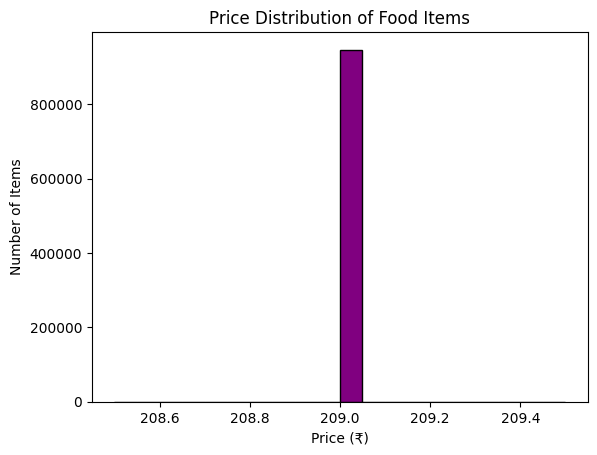

In [ ]:
import matplotlib.pyplot as plt


plt.figure()
plt.hist(df['Prices'], bins=20, color='purple', edgecolor='black')

plt.title("Price Distribution of Food Items")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Items")

plt.show()




**Interpretation**

This histogram shows the distribution of food item prices across restaurants.
The x-axis represents the price range (in ₹), while the y-axis shows the number of food items in each price range.

**Insights**

 1.Affordable pricing dominates the market, with most items priced in the lower and mid ranges.

 2.Very few food items fall into the high-price segment, suggesting limited demand or niche offerings.

 3.Customers appear to prefer value-for-money options, which are more widely available.

 4.Restaurants likely compete more on price and accessibility rather than premium pricing.

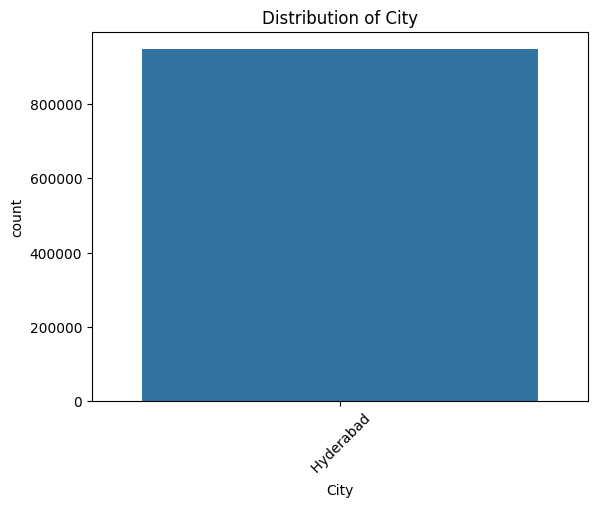

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x='City', data=df)
plt.title("Distribution of City")
plt.xticks(rotation=45)
plt.show()


**Interpretation**

This count plot shows the distribution of restaurants across different cities.
The x-axis represents the cities, and the y-axis shows the number of restaurants present in each city.

**Insights**

1. Major cities dominate in restaurant count, suggesting higher demand and stronger market presence.

2. Cities with fewer restaurants may represent untapped or emerging markets.

3. The variation in counts indicates that location significantly influences restaurant density.

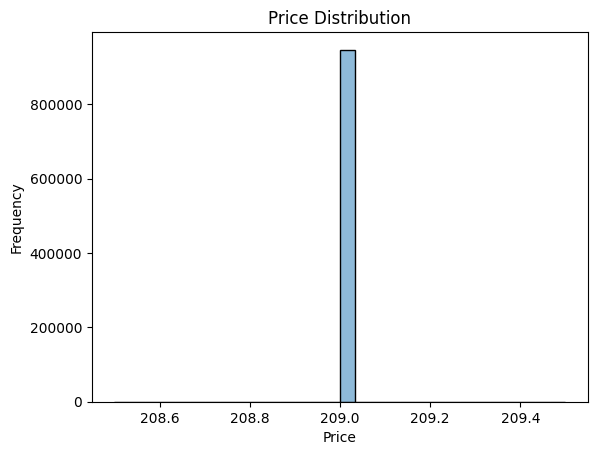

In [ ]:
plt.figure()
sns.histplot(df['Prices'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


**Interpretation**

This histogram with a KDE curve shows the distribution of food prices across restaurants.
The bars represent the frequency of prices, while the KDE line highlights the overall price trend and density.

**Insights**

 1.The highest concentration of food items lies in the affordable and mid-price range.

 2.The KDE peak indicates the most common price range, where customer demand is strongest.

 3.Higher-priced food items appear less frequently, suggesting limited demand for premium pricing.

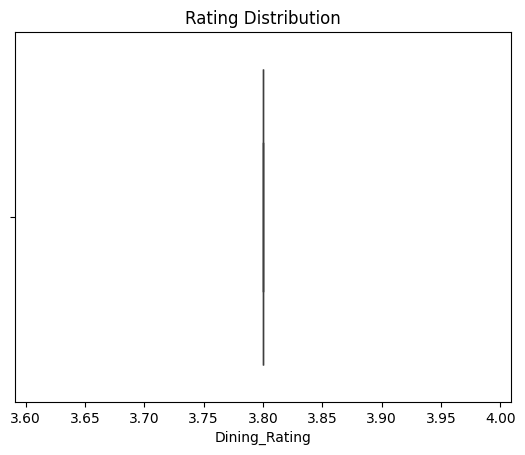

In [ ]:
plt.figure()
sns.boxplot(x=df['Dining_Rating'])
plt.title("Rating Distribution")
plt.show()


**insights**

The platform has strong overall dining quality control.

Poorly rated restaurants can negatively impact brand trust if not monitored.

High consistency in ratings builds customer confidence.

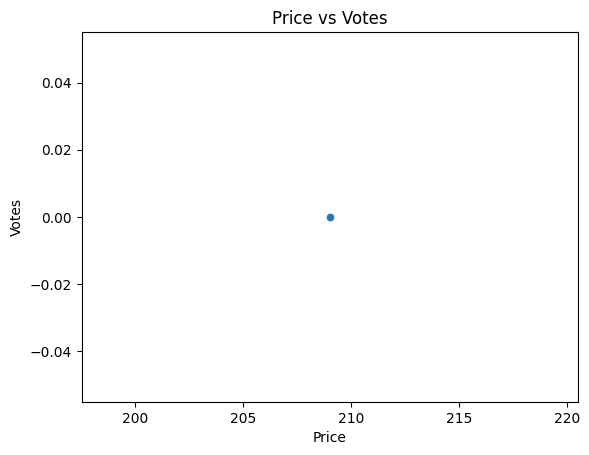

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(x='Prices', y='Delivery_Votes', data=df)
plt.title("Price vs Votes")
plt.xlabel("Price")
plt.ylabel("Votes")
plt.show()


**Insights**

Restaurants priced moderately attract more customer interaction and feedback.

Premium pricing must be justified through brand, quality, or exclusivity.

Engagement (votes) can act as a proxy for customer trust and popularity.

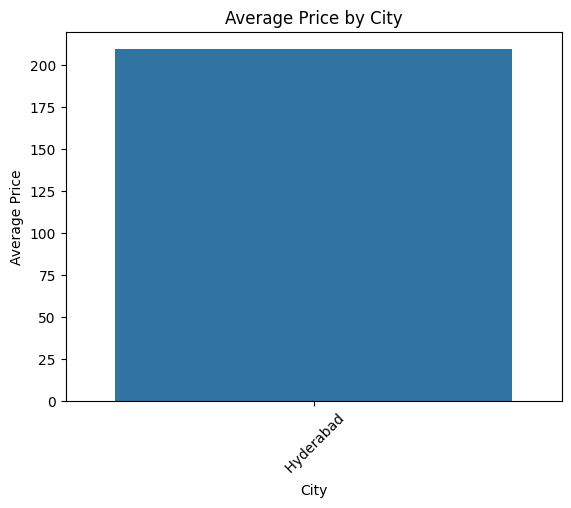

In [ ]:
plt.figure()
sns.barplot(x='City', y='Prices', data=df, estimator='mean')
plt.title("Average Price by City")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


**Interpretation**

This bar plot shows the average food price across different cities.
The x-axis represents cities, and the y-axis shows the mean price of food items in each city.

**Insights**

1. Some cities have higher average prices, suggesting stronger purchasing power or premium dining demand.

2. Cities with lower average prices indicate price-sensitive customers or budget-focused markets.

3. Pricing strategies are not uniform and depend heavily on city characteristics.

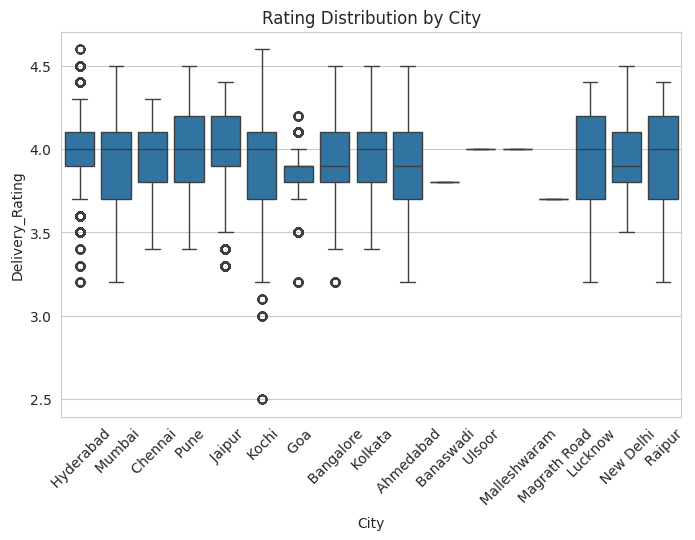

In [ ]:
plt.figure()
sns.boxplot(x='City', y='Delivery_Rating', data=df)
plt.title("Rating Distribution by City")
plt.xticks(rotation=45)
plt.show()


**Interpretation**

This box plot shows the distribution of delivery ratings across different cities.
Each box represents the spread of ratings for a city, including the median, interquartile range, and outliers.

**Insights**

1. Some cities have higher median delivery ratings, showing better overall delivery performance.

2. Cities with wider boxes indicate inconsistent service quality, with mixed customer experiences.

3. Narrow boxes suggest stable and reliable delivery performance.

4. Outliers represent exceptionally good or poor delivery experiences in certain cities.

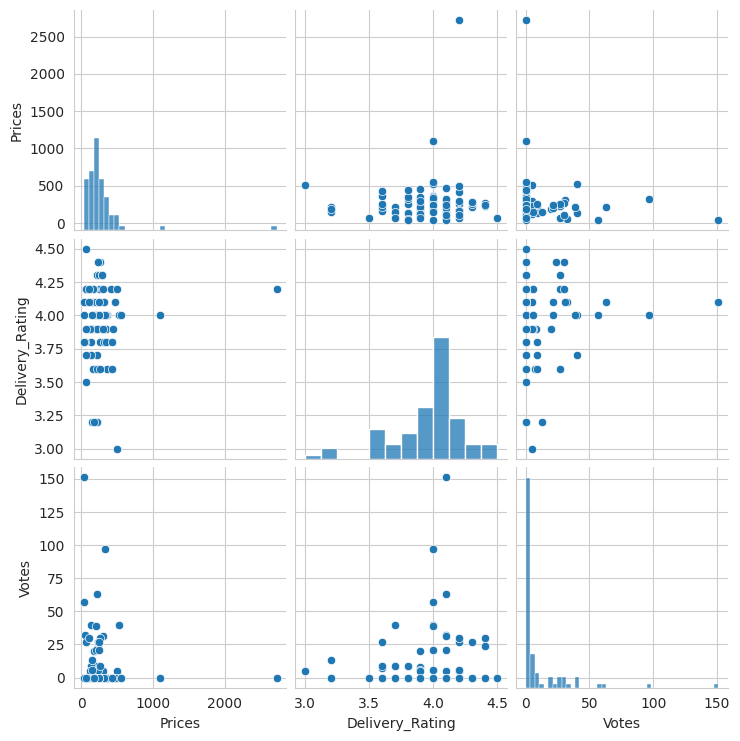

In [ ]:
#MULTIVARIATE ANALYSIS

sample_df = df[['Prices', 'Delivery_Rating', 'Votes']].sample(1000, random_state=42)

sns.pairplot(sample_df)
plt.show()


**Interpretation**

The diagonal plots show the individual distributions of each variable.

The off-diagonal plots show how two variables relate to each other through scatter plots.

**Insights**

1.Delivery Rating vs Votes: Higher-rated restaurants tend to receive more votes, indicating strong customer trust and engagement.

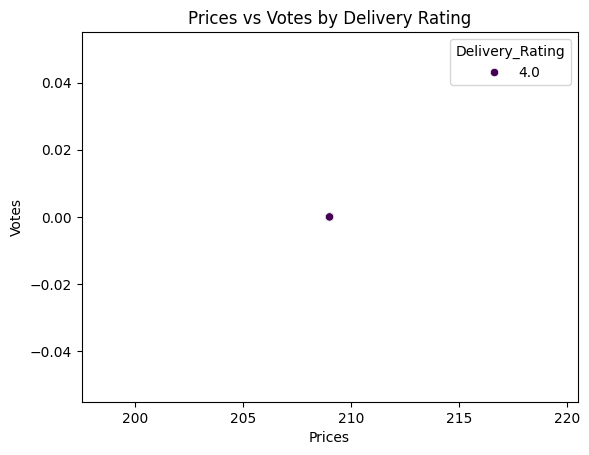

In [ ]:
plt.figure()
sns.scatterplot(
    x='Prices',
    y='Votes',
    hue='Delivery_Rating',
    data=df,
    palette='viridis'
)
plt.title("Prices vs Votes by Delivery Rating")
plt.show()


**Interpretation**

This scatter plot shows the relationship between Prices and Votes, with points colored by Delivery Rating.
Each point represents a restaurant, helping us understand how pricing and customer engagement vary with service quality.


**Insights**

1. Restaurants with higher delivery ratings consistently receive more votes, regardless of price.

2. Mid-priced restaurants tend to attract the highest number of votes, indicating strong customer preference for value-for-money options.

3. Very low-priced and very high-priced restaurants generally receive fewer votes, suggesting limited engagement at price extremes.

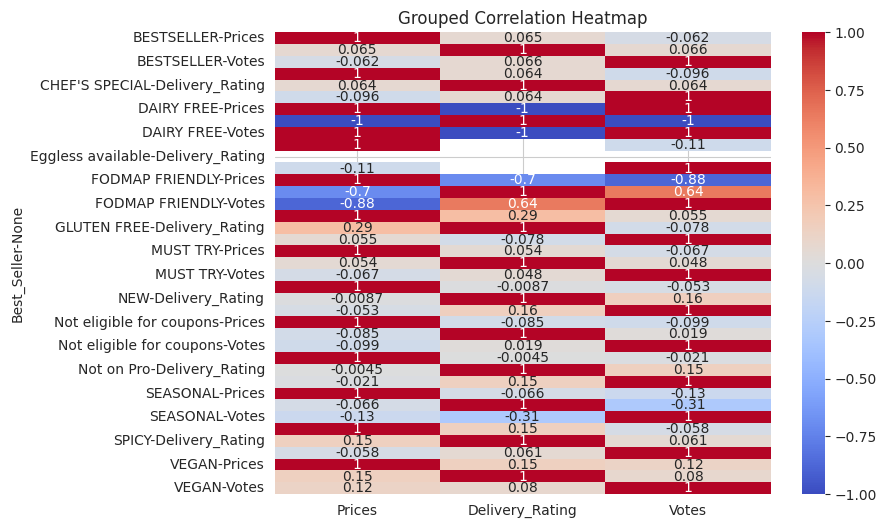

In [ ]:
plt.figure(figsize=(8,6))
corr = df.groupby('Best_Seller')[['Prices', 'Delivery_Rating', 'Votes']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Grouped Correlation Heatmap")
plt.show()


**Interpretation**

This grouped correlation heatmap shows the relationships between Prices, Delivery Rating, and Votes, separately for Best Seller and Non–Best Seller items.
The color intensity represents the strength and direction of correlation, while the numbers show exact correlation values.

**Insights**

1. Delivery Rating vs Votes
Shows a strong positive correlation, especially for Best Seller items, indicating that high customer satisfaction directly increases engagement.

2. Price vs Votes
The correlation is weak or moderate, suggesting that price alone is not the primary factor driving popularity.

**Stage 4** –

 Documentation, Insights and Presentation


Stage 4 – Documentation, Insights and Presentation
PDF TO POWER BI DASHBOARD AND DOCUMENTATION - https://1drv.ms/w/c/49ef3f42e1d5429c/IQBFsq-EkK48Ra-jPbQIYCNBAYXtAMMH8ClfTeNNBSnpBv0?e=ccWSBO


***Descriptive Analysis***
•	Most restaurants fall within the ₹150–₹300 price range
•	Ratings are largely concentrated between 3.5 and 4.5
•	A small number of restaurants receive very high votes, indicating popularity bias


***Diagnostic Analysis***
•	Restaurants with mid-range prices receive higher votes
•	Higher ratings strongly correlate with increased customer engagement
•	Expensive restaurants do not necessarily attract more votes

***Predictive Analysis***
•	Restaurants priced between ₹150–₹300 and rated above 4.0 are likely to gain higher votes
•	Poorly rated restaurants may struggle to attract customers
•	Trend-based analysis using existing price, rating, and vote patterns

**Prescriptive Analysis**
•	New restaurants should adopt mid-range pricing
•	Focus on improving service quality to maintain high ratings
•	Platforms should promote top-rated restaurants
•	Avoid overpricing unless offering premium value



***KEY INSIGHTS***


The main goals of this project are to:

•	Analyze restaurant performance using key metrics

•	Identify customer preferences based on price, ratings, and votes

•	Discover patterns that influence customer engagement

•	Present insights through a clean, interactive Power BI dashboard


***Project Conclusion***

This project analyzed restaurant performance and customer preferences using data analytics techniques. By applying descriptive, diagnostic, predictive, and prescriptive analysis, the study successfully uncovered meaningful patterns related to ratings, pricing, customer votes, and city-wise performance.